# *Downloading Data Sets*

In [3]:
import pandas as pd
import numpy as np

In [21]:
df_data = pd.read_csv("C:/Users/HP/Downloads/IFT2.csv")
print(df_data.head())


   Water  Acidity   BDV     DF  Colour  IFT Label
0     13    0.005  48.0  0.038     2.0   24  good
1     22    0.096  68.0  0.021     3.0   17   bad
2      8    0.030  70.0  0.013     1.0   26  good
3     12    0.032  57.0  0.010     1.0   26  good
4      6    0.036  77.0  0.034     2.0   24  good


In [22]:
df_data_reg_labels = pd.DataFrame(df_data['Label'])

df_data_reg = df_data
df_data_reg.drop(columns=['Label'], inplace = True, axis=1)
df_data_reg.head()


,Water,Acidity,BDV,DF,Colour,IFT
0,13,0.005,48.0,0.038,2.0,24
1,22,0.096,68.0,0.021,3.0,17
2,8,0.030,70.0,0.013,1.0,26
3,12,0.032,57.0,0.010,1.0,26
4,6,0.036,77.0,0.034,2.0,24


# *Pre-processing Data*

## *3-Class Classification* 

In [3]:
def generate_labels(label):
    if(label =="excellent"):
        return 0
    elif(label =="good"):
        return 1
    elif(label =="bad"):
        return 2

df_data['labels'] = df_data.apply(lambda x : generate_labels(x['Label']),axis=1)
df_data.drop(columns=['Label','IFT'],inplace=True,axis=1)
print(df_data.head())

   Water  Acidity   BDV     DF  Colour  labels
0     13    0.005  48.0  0.038     2.0       1
1     22    0.096  68.0  0.021     3.0       2
2      8    0.030  70.0  0.013     1.0       1
3     12    0.032  57.0  0.010     1.0       1
4      6    0.036  77.0  0.034     2.0       1


,Labels,Count
labels,,
0,excellent,507
1,good,78
2,bad,145


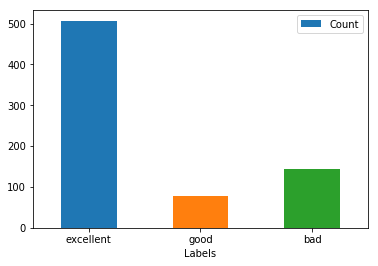

In [237]:
# Count of each class and its pictorial view
df_visual= pd.DataFrame(df_data.groupby('labels').size())
df_visual['Labels'] = ['excellent','good','bad']
df_visual['Count']= df_visual.iloc[:,0]

df_visual = df_visual.iloc[:,1:3]
df_visual.plot.bar(x='Labels', y='Count', rot=0)
df_visual



In [4]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_data = df_data['labels'].values
X_data = df_data.iloc[:,0:5].values
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)



In [5]:
# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, test_size=0.10, random_state=42)
    

# *Classification Metrics*

In [4]:
# Confusion matrix plotting
import seaborn as sns
import matplotlib.pyplot as plt 

def confusion_matrix_plot(cm):    

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['excellent', 'good','bad']); ax.yaxis.set_ticklabels(['excellent', 'good','bad']);
    

In [5]:
# Generate Classification Report
from __future__ import division
from sklearn.metrics import classification_report
def generate_report(y_test,y_pred):
    target_names = ['excellent', 'good', 'bad']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
# Generate individual accuracies
def individual_accuracies(conf_matrix):
    print("Accuracy of Excellent : ", (conf_matrix[0,0]/np.sum(conf_matrix[0,:])*100))
    print("Accuracy of Good : ", (conf_matrix[1,1]/np.sum(conf_matrix[1,:])*100))
    print("Accuracy of Bad : ", (conf_matrix[2,2]/np.sum(conf_matrix[2,:])*100))
    

# Miss-classification of bad Transformers
def miss_bad(conf_matrix):
    print conf_matrix[2,2],"/", np.sum(conf_matrix[2,:]), " transformers correctly classified as bad and ",np.sum(conf_matrix[2,0:2]),"/", np.sum(conf_matrix[2,:]),"bad transformers classified having no problem"
    print("Miss-classification of Bad Transformers : ", (np.sum(conf_matrix[2,0:2])/np.sum(conf_matrix[2,:])*100))
    
    


# *Naive Bayes*

('accuracy =', 82.1917808219178)
             precision    recall  f1-score   support

  excellent       0.79      1.00      0.88        44
       good       0.00      0.00      0.00         9
        bad       0.94      0.80      0.86        20

avg / total       0.73      0.82      0.77        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 0.0)
('Accuracy of Bad : ', 80.0)
16 / 20  transformers correctly classified as bad and  4 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 20.0)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


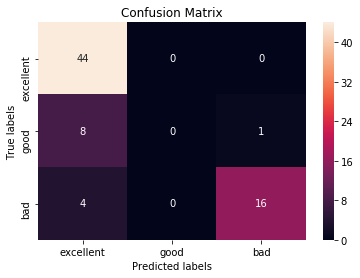

In [146]:
# Naive Bayes Algorithm
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)
y_pred = naive_bayes.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


# *Support Vector Machine*

('accuracy =', 86.3013698630137)
             precision    recall  f1-score   support

  excellent       0.90      1.00      0.95        44
       good       0.00      0.00      0.00         9
        bad       0.79      0.95      0.86        20

avg / total       0.76      0.86      0.81        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 0.0)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


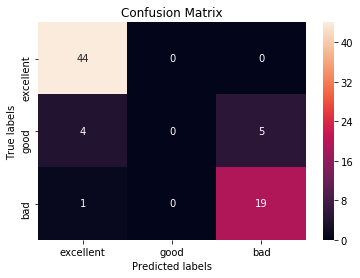

In [147]:
#Support Vector Machine
from sklearn import svm
support_vector = svm.SVC(gamma='auto',kernel='rbf')
support_vector.fit(X_train,y_train)
y_pred = support_vector.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)



In [125]:
# Grid Search CV for SVM
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1,2,5,8,10]}
support_vector = svm.SVC(gamma='auto')
grid_search_svm = GridSearchCV(support_vector, parameters, cv=5)
grid_search_svm.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 2, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [126]:
# Best parameters
grid_search_svm.best_params_

{'C': 10, 'kernel': 'linear'}

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.92      1.00      0.96        44
       good       0.50      0.11      0.18         9
        bad       0.83      0.95      0.88        20

avg / total       0.84      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


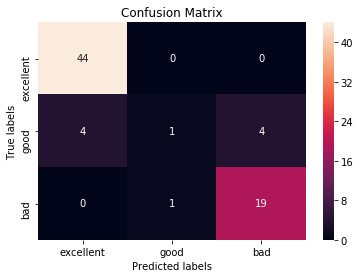

In [148]:
# Support Vector Machine with best parameter set
from sklearn import svm
support_vector = svm.SVC(gamma='auto',kernel='linear',C=10)
support_vector.fit(X_train,y_train)
y_pred = support_vector.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)

# *Logistic Regression*

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.90      1.00      0.95        44
       good       1.00      0.11      0.20         9
        bad       0.83      0.95      0.88        20

avg / total       0.89      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


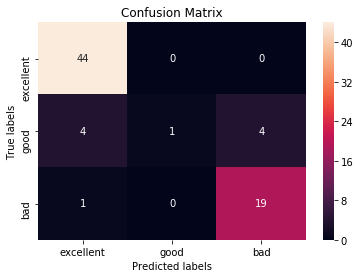

In [150]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


In [167]:
# Grid Search CV for Logistic Regression
from sklearn.model_selection import GridSearchCV
parameters = { 'C':(list(np.logspace(0, 4, 10))), 'solver' :('lbfgs','newton-cg','sag')}
logistic = LogisticRegression(random_state=0,multi_class='multinomial')
grid_search_logistic = GridSearchCV(logistic, parameters, cv=5)
grid_search_logistic.fit(X_train,y_train)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 2.7825594022071245, 7.742636826811269, 21.544346900318832, 59.94842503189409, 166.81005372000593, 464.15888336127773, 1291.5496650148827, 3593.813663804626, 10000.0], 'solver': ('lbfgs', 'newton-cg', 'sag')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [168]:
# Best parameters
grid_search_logistic.best_params_

{'C': 464.15888336127773, 'solver': 'lbfgs'}

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.92      1.00      0.96        44
       good       0.50      0.11      0.18         9
        bad       0.83      0.95      0.88        20

avg / total       0.84      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


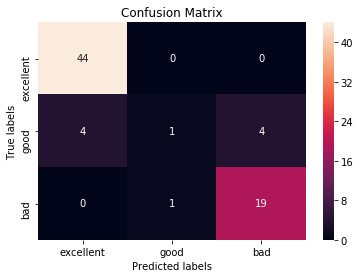

In [169]:
# Logistic Regression with best parameter set

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty='l2',random_state=0, solver='lbfgs',multi_class='multinomial',C=464.15888336127773)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


# *Random Forest*

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.92      1.00      0.96        44
       good       0.50      0.11      0.18         9
        bad       0.83      0.95      0.88        20

avg / total       0.84      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


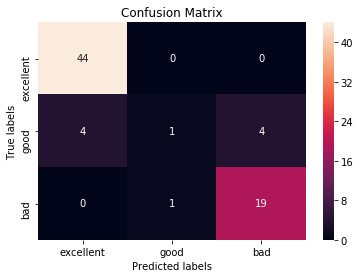

In [176]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


# *Feature Selection*
## *1.Univariate Selection*

,Score
Feature,
Water,10.876739
Acidity,106.994034
BDV,0.693949
DF,54.147471
Color,228.579744


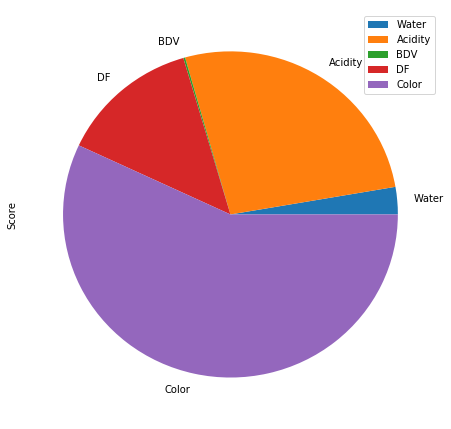

In [201]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_features = pd.DataFrame(["Water","Acidity","BDV","DF","Color"])
features_score = pd.concat([df_features,df_scores,],axis=1)
features_score.columns=['Feature','Score']
features_score = features_score.set_index('Feature')
features_score.plot.pie(y='Score', figsize=(7.5, 7.5))
features_score

## *2. Feature Importance*

,Features,Importance
0,Water,0.086261
1,Acidity,0.210766
2,BDV,0.113150
3,DF,0.245279
4,Color,0.344544


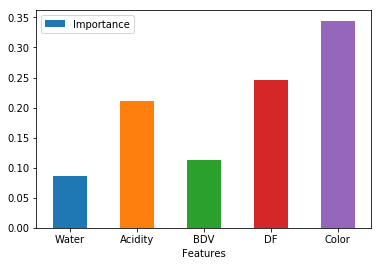

In [200]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

feature_imp = ExtraTreesClassifier()
feature_imp.fit(X_train,y_train)
features_df = pd.DataFrame({'Features': ["Water","Acidity","BDV","DF","Color"], 'Importance': feature_imp.feature_importances_})
features_df.plot.bar(x='Features', y='Importance', rot=0)
features_df

## *3. Correlation Matrix*

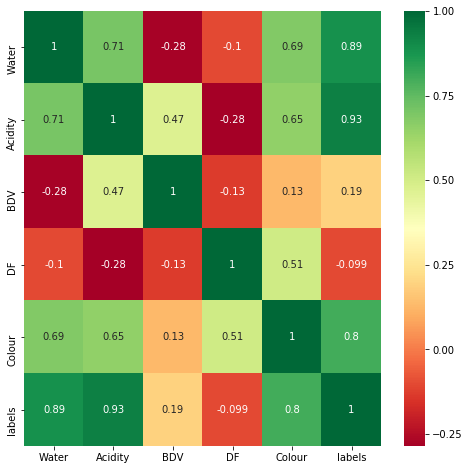

In [218]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_data.iloc[0:5].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_data.iloc[0:5][top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Result:** In accordance to all the feature selection techniques the most important features are **1.** *Color* **2.** *Acidity* **3.** *Dissipation Factor*

# *T-SNE Visualization*

In [8]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3)
X_tsne = X_embedded.fit_transform(X_data)

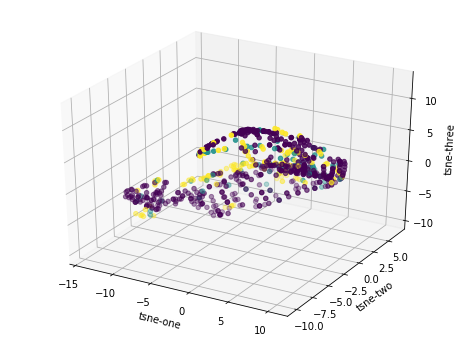

In [187]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(8,6)).gca(projection='3d')
ax.scatter(
    xs=X_tsne[:,0], 
    ys=X_tsne[:,1], 
    zs=X_tsne[:,2], 
    c=y_data

)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()


## *N- Fold Cross Validation*


### *1. Visualization*

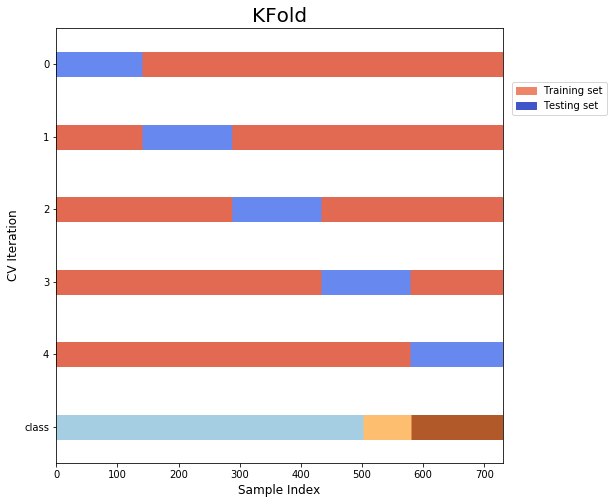

In [131]:
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
n_splits = 5
cv = KFold(n_splits)

def cross_valid_visual(cv,X_data_scaled,y_data):
        from matplotlib.patches import Patch
        np.random.seed(1338)
        cmap_data = plt.cm.Paired
        cmap_cv = plt.cm.coolwarm
        fig, ax = plt.subplots(figsize=(8, 8))
        for location, (train, test) in enumerate(cv.split(X=X_data_scaled, y=y_data)):
            array_cv = np.array([-5]*len(X_data_scaled))
            array_cv[train] = 1
            array_cv[test] = 0

            ax.scatter(range(len(array_cv)), [location + 0.5] * len(array_cv),
                           c=array_cv, marker='_', lw=25, cmap=cmap_cv,
                           vmin=-.2, vmax=1.2)
            ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
                      ['Training set', 'Testing set'], loc=(1.02, .8))

        ax.scatter(range(len(y_data)), [location + 1.5] * len(y_data),
                       c=np.sort(y_data), marker='_', lw=25, cmap=cmap_data)

        yticklabels = list(range(n_splits)) + ['class']
        ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
                   ylim=[n_splits+1, 0], xlim=[0, len(X_data_scaled)])
        ax.set_ylabel('CV Iteration', fontsize=12)
        ax.set_xlabel('Sample Index', fontsize=12)
        
        ax.set_title('{}'.format(type(cv).__name__), fontsize=20)

cross_valid_visual(cv,X_data_scaled,y_data)

### *2. Model Evaluation with Cross Validation*

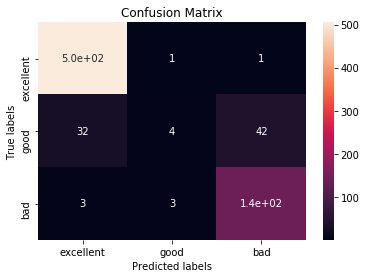

In [82]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
y_pred = cross_val_predict(random_forest, X_data_scaled, y_data, cv=5)
conf_matrix = confusion_matrix(y_data, y_pred)
confusion_matrix_plot(conf_matrix)


**Result :** Classification of Good class is again not accurate therefore shifting to make the classification of good better

## *Two-Class Classification(One vs All)* 

In [281]:
# Changing the input data
df_data_one_all = pd.read_csv("C:/Users/HP/Downloads/IFT2.csv")

def generate_labels_one_all(label):
    if(label =="excellent"):
        return 1
    elif(label =="good"):
        return 0
    elif(label =="bad"):
        return 0

df_data_one_all['labels'] = df_data_one_all.apply(lambda x : generate_labels_one_all(x['Label']),axis=1)
df_data_one_all.drop(columns=['Label','IFT'],inplace=True,axis=1)
print(df_data_one_all.head())

   Water  Acidity   BDV     DF  Colour  labels
0     13    0.005  48.0  0.038     2.0       0
1     22    0.096  68.0  0.021     3.0       0
2      8    0.030  70.0  0.013     1.0       0
3     12    0.032  57.0  0.010     1.0       0
4      6    0.036  77.0  0.034     2.0       0


## *Pair Wise Correlation Plots*

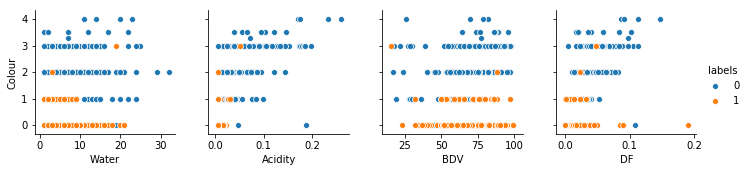

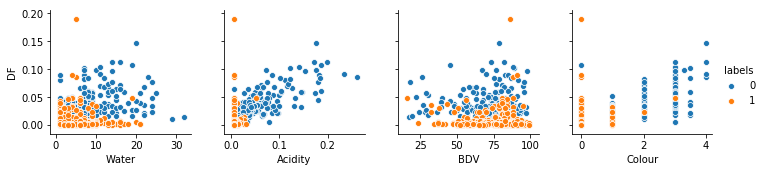

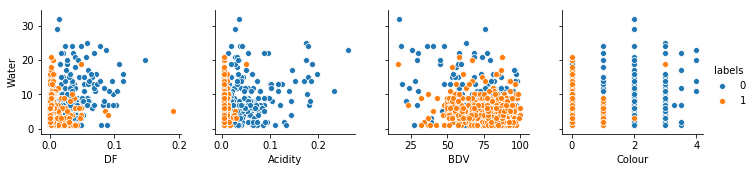

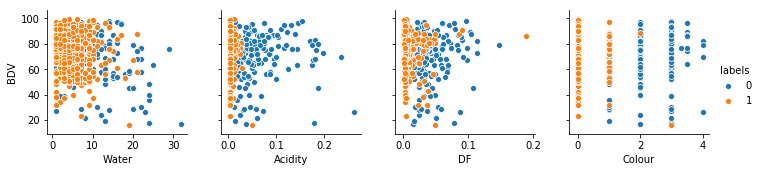

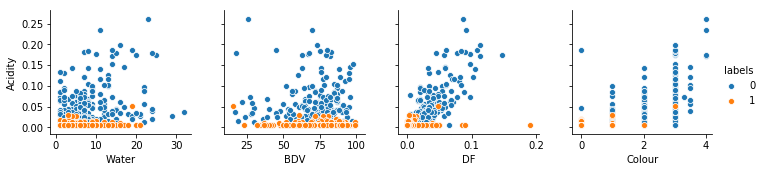

In [283]:


import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_data_one_all, x_vars=['Water','Acidity','BDV','DF'], y_vars='Colour',hue='labels')
sns.pairplot(df_data_one_all, x_vars=['Water','Acidity', 'BDV','Colour'], y_vars='DF',hue='labels')
sns.pairplot(df_data_one_all, x_vars=['DF','Acidity', 'BDV','Colour'], y_vars='Water',hue='labels')
sns.pairplot(df_data_one_all, x_vars=['Water','Acidity', 'DF','Colour'], y_vars='BDV',hue='labels')
sns.pairplot(df_data_one_all, x_vars=['Water','BDV', 'DF','Colour'], y_vars='Acidity',hue='labels')
plt.show()

          Labels  Count
labels                 
0       Not Good    223
1           Good    507


,Labels,Count
labels,,
0,Not Good,223
1,Good,507


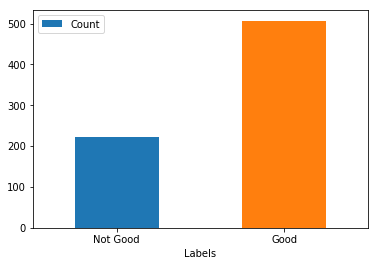

In [7]:
# Count of each class and its pictorial view
df_visual_one_all= pd.DataFrame(df_data_one_all.groupby('labels').size())


df_visual_one_all['Labels'] = ['Not Good','Good']
df_visual_one_all['Count']= df_visual_one_all.iloc[:,0]

df_visual_one_all = df_visual_one_all.iloc[:,1:3]
print(df_visual_one_all)
df_visual_one_all.plot.bar(x='Labels', y='Count', rot=0)
df_visual_one_all


In [8]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_data_one_all = df_data_one_all['labels'].values
X_data_one_all = df_data_one_all.iloc[:,0:5].values
scaler_one_all = MinMaxScaler()
X_data_scaled_one_all = scaler_one_all.fit_transform(X_data_one_all)

# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train_one_all, X_test_one_all, y_train_one_all, y_test_one_all = train_test_split(X_data_scaled_one_all, y_data_one_all, test_size=0.10, random_state=42)
    


## *T-SNE Visualization(2-class classification)*

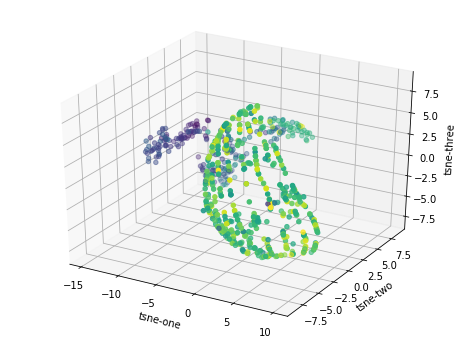

In [284]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3)
X_tsne_one = X_embedded.fit_transform(X_data_scaled_one_all)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(8,6)).gca(projection='3d')
ax.scatter(
    xs=X_tsne_one[:,0], 
    ys=X_tsne_one[:,1], 
    zs=X_tsne_one[:,2], 
    c=y_data

)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

In [11]:
# Confusion matrix plotting
import seaborn as sns
import matplotlib.pyplot as plt 

def confusion_matrix_plot_one_all(cm):    

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Good', 'Good']); ax.yaxis.set_ticklabels(['Not Good', 'Good']);


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


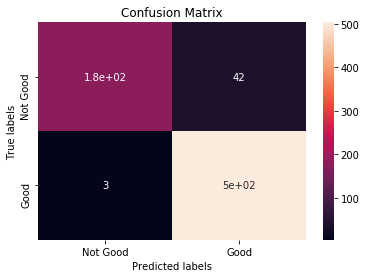

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_one_all = cross_val_predict(logistic, X_data_scaled_one_all, y_data_one_all, cv=5)
conf_matrix = confusion_matrix(y_data_one_all, y_pred_one_all)
confusion_matrix_plot_one_all(conf_matrix)

**Result:** Even the *one vs all* technique doesnot work with random forest which are known to work well for imbalanced data sets. Now we need to deal with the class imbalance problem by : (a) Upsampling the minority class (b) Downsampling class (c) Generating synthetic data

## *Data Tweaking* 

### *1.Oversampling Minority Class* 

In [150]:
from sklearn.utils import resample
import pandas as pd

df_good = df_data_one_all[df_data_one_all['labels']==1]
df_not_good = df_data_one_all[df_data_one_all['labels']==0]

df_good.drop(columns=['labels'],inplace=True,axis=1)
df_not_good.drop(columns=['labels'],inplace=True,axis=1)

not_good_upsample = resample(df_not_good.values,
                          replace=True, # sample with replacement
                          n_samples=len(df_good.values), # match number in majority class
                          random_state=27) # reproducible results

good_upsample = df_good.values

df_good_upsample = pd.DataFrame(list(good_upsample))
df_good_upsample['labels'] = [1]*len(good_upsample)

df_not_good_upsample = pd.DataFrame(list(not_good_upsample))
df_not_good_upsample['labels'] = [0]*len(not_good_upsample)


upsampled_df = pd.concat([df_good_upsample, df_not_good_upsample])

upsampled_df.head()




C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,0,1,2,3,4,labels
0,19.0,0.051,16.0,0.048,3.0,1
1,6.0,0.005,66.0,0.005,1.0,1
2,5.0,0.027,81.0,0.014,1.0,1
3,3.0,0.021,86.0,0.013,0.0,1
4,6.0,0.005,64.0,0.024,0.0,1


,Labels,Count
labels,,
0,Not Good,507
1,Good,507


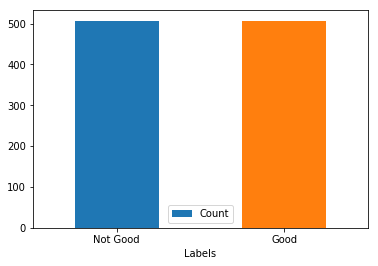

In [151]:
# Count of each class and its pictorial view
df_visual_up= pd.DataFrame(upsampled_df.groupby('labels').size())


df_visual_up['Labels'] = ['Not Good','Good']
df_visual_up['Count']= df_visual_up.iloc[:,0]

df_visual_up = df_visual_up.iloc[:,1:3]
df_visual_up.plot.bar(x='Labels', y='Count', rot=0)
df_visual_up

In [152]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_data_up = upsampled_df['labels'].values
X_data_up = upsampled_df.iloc[:,0:5].values
scaler_up = MinMaxScaler()
X_data_up = scaler_up.fit_transform(X_data_up)

# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_data_up, y_data_up, test_size=0.10, random_state=42)
    


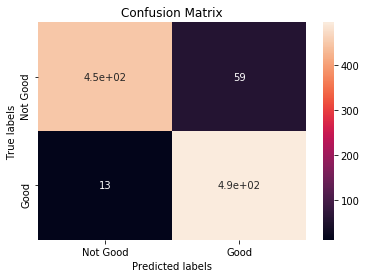

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_up = cross_val_predict(logistic, X_data_up, y_data_up, cv=5)
conf_matrix = confusion_matrix(y_data_up, y_pred_up)
confusion_matrix_plot_one_all(conf_matrix)

### *2. Downsampling Majority Class*

In [153]:
from sklearn.utils import resample
import pandas as pd

good_down = resample(df_good.values,
                          replace=True, # sample with replacement
                          n_samples=len(df_not_good.values), # match number in majority class
                          random_state=27) # reproducible results

not_good_down = df_not_good.values

df_not_good_down = pd.DataFrame(list(not_good_down))
df_not_good_down['labels'] = [0]*len(not_good_down)

df_good_down = pd.DataFrame(list(good_down))
df_good_down['labels'] = [1]*len(good_down)


downsampled_df = pd.concat([df_good_down, df_not_good_down])

downsampled_df.head()



,0,1,2,3,4,labels
0,5.0,0.005,88.4,0.003,0.0,1
1,5.0,0.005,70.0,0.001,0.0,1
2,4.0,0.005,71.0,0.009,1.0,1
3,5.0,0.005,84.0,0.014,0.0,1
4,3.0,0.005,58.0,0.001,0.0,1


,Labels,Count
labels,,
0,Not Good,223
1,Good,223


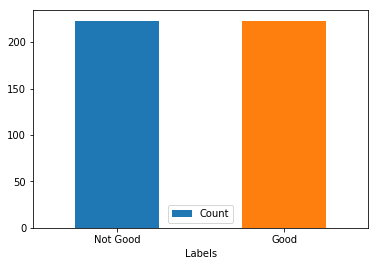

In [154]:
# Count of each class and its pictorial view
df_visual_down= pd.DataFrame(downsampled_df.groupby('labels').size())


df_visual_down['Labels'] = ['Not Good','Good']
df_visual_down['Count']= df_visual_down.iloc[:,0]

df_visual_down = df_visual_down.iloc[:,1:3]
df_visual_down.plot.bar(x='Labels', y='Count', rot=0)
df_visual_down

In [155]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_data_down = downsampled_df['labels'].values
X_data_down = downsampled_df.iloc[:,0:5].values
scaler_down = MinMaxScaler()
X_data_down = scaler_down.fit_transform(X_data_down)

# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_data_down, y_data_down, test_size=0.10, random_state=42)
    

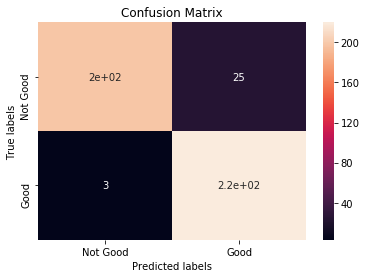

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_down = cross_val_predict(logistic, X_data_down, y_data_down, cv=5)
conf_matrix = confusion_matrix(y_data_down, y_pred_down)
confusion_matrix_plot_one_all(conf_matrix)

### *3. Synthetic Augmentation*

In [179]:


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

sm = SMOTE(random_state=27, ratio=1.0)
X_sm, y_sm = sm.fit_sample(X_data_scaled_one_all, y_data_one_all)

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_sm = cross_val_predict(logistic, X_sm, y_sm, cv=5)
conf_matrix = confusion_matrix(y_sm, y_pred_sm)
confusion_matrix_plot_one_all(conf_matrix)


"\n#from imblearn.over_sampling import SMOTE\nfrom sklearn.model_selection import cross_val_predict\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.linear_model import LogisticRegression\n\nsm = SMOTE(random_state=27, ratio=1.0)\nX_sm, y_sm = sm.fit_sample(X_data_scaled_one_all, y_data_one_all)\n\nlogistic = LogisticRegression(random_state=0, solver='lbfgs')\ny_pred_sm = cross_val_predict(logistic, X_sm, y_sm, cv=5)\nconf_matrix = confusion_matrix(y_sm, y_pred_sm)\nconfusion_matrix_plot_one_all(conf_matrix)\n"

## *Feature Extraction*

### *1. Principal Component Analysis(PCA)*

,Components,Variance
0,comp1,0.607403
1,comp2,0.210148
2,comp3,0.108994
3,comp4,0.050163
4,comp5,0.023292


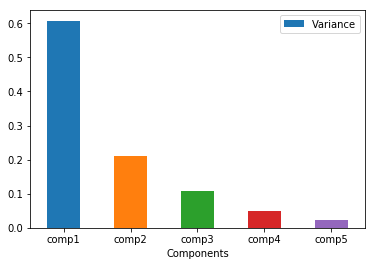

In [130]:
from sklearn.decomposition import PCA
num_features = 5
pca_one_all = PCA(n_components = num_features)
pca_one_all.fit(X_data_scaled_one_all)
variance_ratio = pca_one_all.explained_variance_ratio_

components_df = pd.DataFrame({'Components': ["comp1","comp2","comp3","comp4","comp5"], 'Variance': variance_ratio})
components_df.plot.bar(x='Components', y='Variance', rot=0)
components_df


**Result:** The first three components are responsible for most of the variance of data *(93%)* therefore we would continue our analysis using only the first three components

### *Visualization of PCA* 

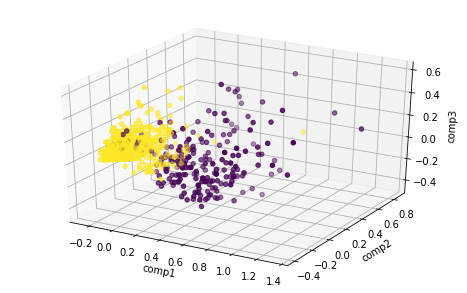

In [116]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


num_features = 3
pca = PCA(n_components = num_features)
X_pca = pca.fit_transform(X_data_scaled_one_all)
ax = plt.figure(figsize=(8,5)).gca(projection='3d')
ax.scatter(
    xs=X_pca[:,0], 
    ys=X_pca[:,1], 
    zs=X_pca[:,2], 
    c=y_data_one_all

)
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.show()


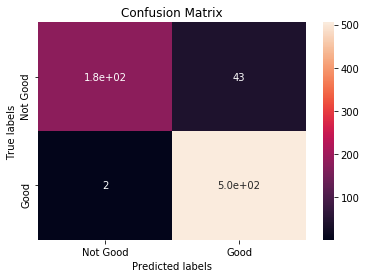

In [117]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

num_features = 3



pca = PCA(n_components = num_features)
X_pca = pca.fit_transform(X_data_scaled_one_all)

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_pca = cross_val_predict(logistic, X_pca, y_data_one_all, cv=5)
conf_matrix_pca = confusion_matrix(y_data_one_all, y_pred_pca)
confusion_matrix_plot_one_all(conf_matrix_pca)

### *2. Linear Discriminant Analysis(LDA)*

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_features = 2
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit(X_data_scaled_one_all,y_data_one_all).transform(X_data_scaled_one_all)


print(lda.explained_variance_ratio_)

[1.]


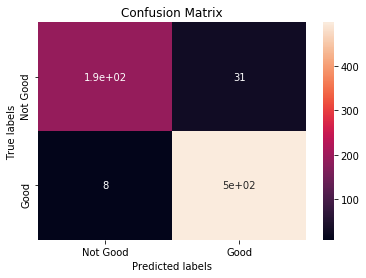

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_lda = cross_val_predict(logistic, X_lda, y_data_one_all, cv=5)
conf_matrix_lda = confusion_matrix(y_data_one_all, y_pred_lda)
confusion_matrix_plot_one_all(conf_matrix_lda)

## *Feature Subsets*

### *1. Subset of top three features* 

The top three features based on feature importance are ***Colour***, ***Acidity*** and Dissipation Factor(***DF***)

In [26]:
df_subset = df_data_one_all[['Acidity','DF','Colour','labels']]
df_subset.head()

,Acidity,DF,Colour,labels
0,0.005,0.038,2.0,0
1,0.096,0.021,3.0,0
2,0.030,0.013,1.0,0
3,0.032,0.010,1.0,0
4,0.036,0.034,2.0,0


In [27]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_sub = df_subset['labels'].values
X_sub = df_subset.iloc[:,0:3].values
scaler_sub = MinMaxScaler()
X_scaled_sub = scaler_sub.fit_transform(X_sub)

# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_scaled_sub, y_sub, test_size=0.10, random_state=42)

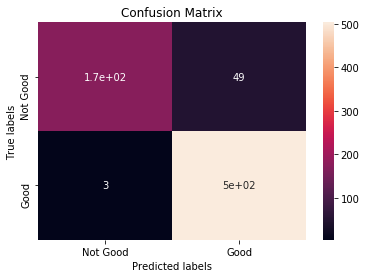

In [30]:
#Five Fold Cross Validation

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_sub = cross_val_predict(logistic, X_scaled_sub, y_sub, cv=5)
conf_matrix_sub = confusion_matrix(y_sub, y_pred_sub)
confusion_matrix_plot_one_all(conf_matrix_sub)

('accuracy =', 91.78082191780823)


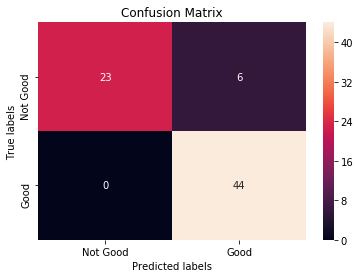

In [29]:
# No cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logistic.fit(X_train_sub,y_train_sub)
y_pred_sub = logistic.predict(X_test_sub)
score = accuracy_score(y_test_sub, y_pred_sub, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix_sub = confusion_matrix(y_test_sub, y_pred_sub)
confusion_matrix_plot_one_all(conf_matrix_sub)


### *2. Subset with top two features* 

In [31]:
df_subset_two = df_data_one_all[['Acidity','Colour','labels']]
df_subset_two.head()


,Acidity,Colour,labels
0,0.005,2.0,0
1,0.096,3.0,0
2,0.030,1.0,0
3,0.032,1.0,0
4,0.036,2.0,0


In [32]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_sub_two = df_subset_two['labels'].values
X_sub_two = df_subset_two.iloc[:,0:2].values
scaler_sub_two = MinMaxScaler()
X_scaled_sub_two = scaler_sub_two.fit_transform(X_sub_two)

# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train_sub_two, X_test_sub_two, y_train_sub_two, y_test_sub_two = train_test_split(X_scaled_sub_two, y_sub_two, test_size=0.10, random_state=42)

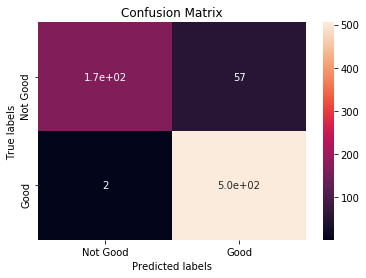

In [33]:
#Five Fold Cross Validation

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_sub_two = cross_val_predict(logistic, X_scaled_sub_two, y_sub_two, cv=5)
conf_matrix_sub_two = confusion_matrix(y_sub_two, y_pred_sub_two)
confusion_matrix_plot_one_all(conf_matrix_sub_two)

## *Prototypical Approach(Clustering)*

In [34]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd

num_features = 2
pca_one_all = PCA(n_components = num_features)
X_cluster = pca_one_all.fit_transform(X_data_scaled_one_all)


kmeans = KMeans(n_clusters=2)
kmeans.fit(df_data_one_all.iloc[:,0:5])
cluster_labels = kmeans.predict(df_data_one_all.iloc[:,0:5])
cluster_centroids = kmeans.cluster_centers_

df_cluster = pd.DataFrame(X_cluster)
df_cluster.columns= ['dim1','dim2']



<Figure size 360x360 with 0 Axes>

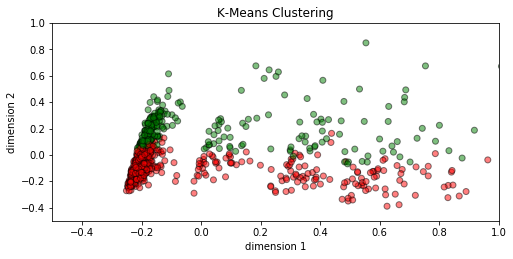

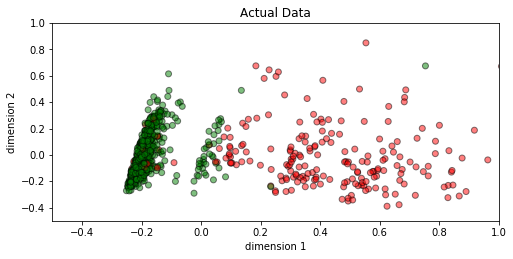

In [35]:
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g'}

colors1 = map(lambda x: colmap[x+1], cluster_labels)
colors2 = map(lambda x: colmap[x+1], df_data_one_all['labels'].values)

plt.subplots(figsize=(8, 8))

plt.subplot(211)
plt.scatter(df_cluster['dim1'], df_cluster['dim2'], color=colors1, alpha=0.5, edgecolor='k')
plt.xlim(-0.5, 1)
plt.ylim(-0.5, 1)
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("K-Means Clustering")
plt.show()

plt.subplots(figsize=(8, 8))

plt.subplot(212)
plt.scatter(df_cluster['dim1'], df_cluster['dim2'], color=colors2, alpha=0.5, edgecolor='k')
plt.xlim(-0.5, 1)
plt.ylim(-0.5, 1)
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("Actual Data")
plt.show()




# *Regression Analysis*

In [232]:
df_data = pd.read_csv("C:/Users/HP/Downloads/IFT2.csv")
print(df_data.head())


   Water  Acidity   BDV     DF  Colour  IFT Label
0     13    0.005  48.0  0.038     2.0   24  good
1     22    0.096  68.0  0.021     3.0   17   bad
2      8    0.030  70.0  0.013     1.0   26  good
3     12    0.032  57.0  0.010     1.0   26  good
4      6    0.036  77.0  0.034     2.0   24  good


In [233]:
df_data_reg_labels = pd.DataFrame(df_data['Label'])

df_data_reg = df_data
df_data_reg.drop(columns=['Label'], inplace = True, axis=1)
df_data_reg.head()

,Water,Acidity,BDV,DF,Colour,IFT
0,13,0.005,48.0,0.038,2.0,24
1,22,0.096,68.0,0.021,3.0,17
2,8,0.030,70.0,0.013,1.0,26
3,12,0.032,57.0,0.010,1.0,26
4,6,0.036,77.0,0.034,2.0,24


In [234]:
y_data = df_data_reg['IFT'].values
X_data = df_data_reg
X_data.drop(columns=['IFT'], inplace = True, axis=1)
X_data = X_data.values

X_data

array([[1.3e+01, 5.0e-03, 4.8e+01, 3.8e-02, 2.0e+00],
       [2.2e+01, 9.6e-02, 6.8e+01, 2.1e-02, 3.0e+00],
       [8.0e+00, 3.0e-02, 7.0e+01, 1.3e-02, 1.0e+00],
       ...,
       [7.0e+00, 5.0e-03, 9.0e+01, 2.0e-03, 0.0e+00],
       [6.0e+00, 5.0e-03, 6.8e+01, 1.0e-03, 0.0e+00],
       [3.0e+00, 5.0e-03, 6.5e+01, 1.0e-03, 0.0e+00]])

In [235]:
def generate_test_labels(label):
    if(label =="good"):
        return 1
    elif(label =="bad"):
        return 0

df_test = pd.read_csv("C:/Users/HP/Downloads/Testing_Transformers.csv")
df_test['labels'] = df_test.apply(lambda x : generate_test_labels(x['Label']),axis=1)
df_test.drop(columns=['Label'],inplace=True,axis=1)
df_test.head()

,Water,Acidity,BDV,Color,IFT,labels
0,14.35,0.040,44,3.0,22.8,0
1,12.06,0.037,57,2.5,31.7,1
2,14.50,0.049,60,1.5,21.7,0
3,11.45,0.020,52,1.0,27.0,1
4,22.69,0.087,49,1.5,19.7,0


In [245]:
X_train = X_data[:,[0,1,2,4]]
y_train = y_data
X_test = df_test.iloc[:,[0,1,2,3]].values
y_test = df_test.iloc[:,4].values

print("X_train.shape = ",X_train.shape)
print("y_train.shape = ",y_train.shape)
print("X_test.shape = ",X_test.shape)
print("y_test.shape = ",y_test.shape)

print(y_test)


('X_train.shape = ', (730L, 4L))
('y_train.shape = ', (730L,))
('X_test.shape = ', (36L, 4L))
('y_test.shape = ', (36L,))
[22.8 31.7 21.7 27.  19.7 36.1 20.5 30.  31.4 23.2 31.4 21.5 31.9 32.4
 22.5 23.  27.1 28.5 29.6 34.8 19.5 32.3 32.  31.4 21.6 32.8 21.8 32.
 29.1 27.  30.  29.1 26.2 31.  32.3 25.8]


In [47]:
# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.10, random_state=42)

In [226]:
def to_labels(values):
    labels = []
    for i in range(0,len(values)):
        if values[i] < 24:
            labels.append(0)
        else:
            labels.append(1)
    return labels

## *1. Simple Linear Regression*

In [246]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(y_pred)

[ 19.12155846  21.60786785  25.19869338  29.00410944  22.76780524
  31.87662634   8.66997646  26.47099921  31.6657633   26.45502632
  32.79932853   0.91414794  32.27676939  24.26245395  22.02359307
  15.06463232  29.48000115  19.21694769  27.90083819  28.55782735
 -14.30275485  19.64307411  28.95279825  24.45170152  13.47375498
  22.40170881  19.37647205  31.82047474  31.94985148  28.99663247
  27.8067899   19.76128849  26.2950433   26.01024864  28.55988867
  30.19113712]


In [228]:
# Confusion matrix plotting
import seaborn as sns
import matplotlib.pyplot as plt 

def confusion_matrix_plot_one_all(cm):    

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Good', 'Good']); ax.yaxis.set_ticklabels(['Not Good', 'Good']);

('Accuracy : ', 0.8055555555555556)
('F1 Score :', 0.8510638297872342)
('Precision : ', 0.9090909090909091)
('Recall : ', 0.8)


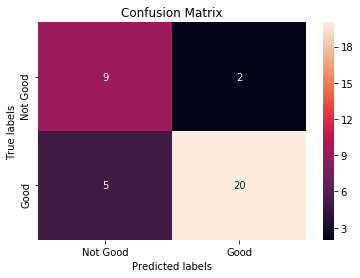

In [247]:
from sklearn.metrics import confusion_matrix
y_test = to_labels(y_test)
y_pred = to_labels(y_pred)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, y_pred))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, y_pred))
# Confusion Matrix Generation
conf_matrix_reg = confusion_matrix(y_test,y_pred)
confusion_matrix_plot_one_all(conf_matrix_reg)

## *2. Lasso Regression( L1 Penalty Term)*

In [249]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=0.1)

lasso_model.fit(X_train,y_train)
y_pred_lasso = lasso_model.predict(X_test)

('Accuracy : ', 0.7222222222222222)
('F1 Score :', 0.782608695652174)
('Precision : ', 0.8571428571428571)
('Recall : ', 0.72)


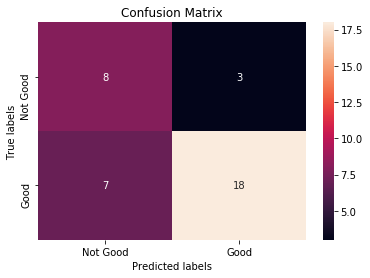

In [250]:
from sklearn.metrics import confusion_matrix
y_pred_lasso = to_labels(y_pred_lasso)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_lasso))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_lasso))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, y_pred_lasso))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, y_pred_lasso))
# Confusion Matrix Generation
conf_matrix_lasso = confusion_matrix(y_test,y_pred_lasso)
confusion_matrix_plot_one_all(conf_matrix_lasso)

## *3. Ridge Regression (L2 Penalty Term)*

In [252]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)

('Accuracy : ', 0.75)
('F1 Score :', 0.7999999999999999)
('Precision : ', 0.9)
('Recall : ', 0.72)


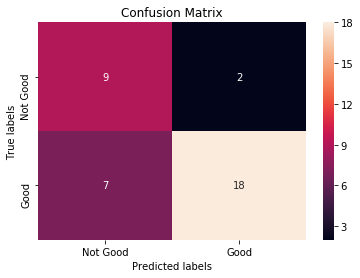

In [253]:
from sklearn.metrics import confusion_matrix
y_pred_ridge = to_labels(y_pred_ridge)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_ridge))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_ridge))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, y_pred_ridge))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, y_pred_ridge))
# Confusion Matrix Generation
conf_matrix_ridge = confusion_matrix(y_test,y_pred_ridge)
confusion_matrix_plot_one_all(conf_matrix_ridge)

## *4. Elastic Net Regression (L1&L2 Penalty Terms)*

In [256]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(random_state=0)
elastic_model.fit(X_train,y_train)
y_pred_elastic = elastic_model.predict(X_test)

('Accuracy : ', 0.75)
('F1 Score :', 0.7999999999999999)
('Precision : ', 0.9)
('Recall : ', 0.72)


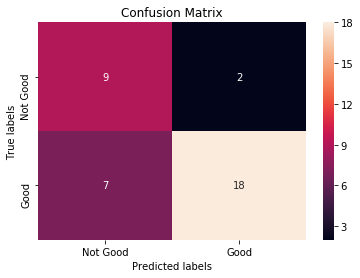

In [257]:
from sklearn.metrics import confusion_matrix
y_pred_elastic = to_labels(y_pred_elastic)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_elastic))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_elastic))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, y_pred_elastic))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, y_pred_elastic))
# Confusion Matrix Generation
conf_matrix_elastic = confusion_matrix(y_test, y_pred_elastic)
confusion_matrix_plot_one_all(conf_matrix_elastic)

## *5. Polynomial Regression*

In [273]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


polynomial_features= PolynomialFeatures(degree=2)
x_poly_train = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)

y_pred_poly = poly_model.predict(x_poly_test)

('Accuracy : ', 0.7777777777777778)
('F1 Score :', 0.8260869565217391)
('Precision : ', 0.9047619047619048)
('Recall : ', 0.76)


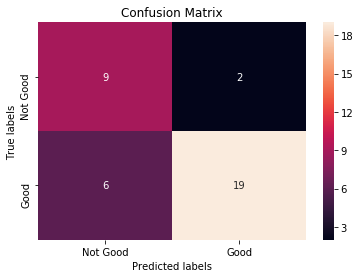

In [274]:
from sklearn.metrics import confusion_matrix
y_pred_poly = to_labels(y_pred_poly)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_poly))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_poly))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, y_pred_poly))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, y_pred_poly))
# Confusion Matrix Generation
conf_matrix_poly_reg = confusion_matrix(y_test,y_pred_poly)
confusion_matrix_plot_one_all(conf_matrix_poly_reg)

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


polynomial_features= PolynomialFeatures(degree=3)
x_poly_train = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)

y_pred_poly = poly_model.predict(x_poly_test)

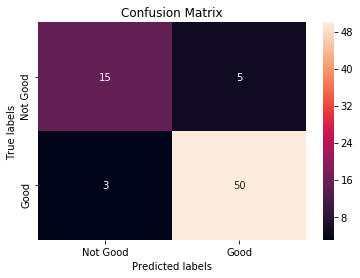

In [91]:
from sklearn.metrics import confusion_matrix
conf_matrix_poly_reg = confusion_matrix(to_labels(y_test), to_labels(y_pred_poly))
confusion_matrix_plot_one_all(conf_matrix_poly_reg)

In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


polynomial_features= PolynomialFeatures(degree=5)
x_poly_train = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)

y_pred_poly = poly_model.predict(x_poly_test)

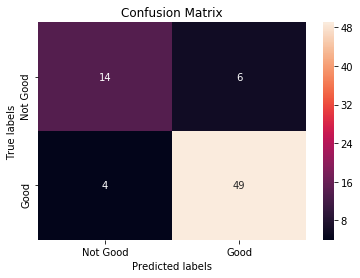

In [93]:
from sklearn.metrics import confusion_matrix
conf_matrix_poly_reg = confusion_matrix(to_labels(y_test), to_labels(y_pred_poly))
confusion_matrix_plot_one_all(conf_matrix_poly_reg)

## *6. Ensemble Based (Bagging) Regressor*

In [275]:
from sklearn.ensemble import BaggingRegressor

model_bag = BaggingRegressor(n_estimators = 15)
model_bag.fit(X_train,y_train)

y_pred_bag = model_bag.predict(X_test)

('Accuracy : ', 0.8055555555555556)
('F1 Score :', 0.8444444444444444)
('Precision : ', 0.95)
('Recall : ', 0.76)


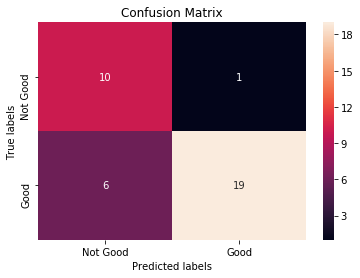

In [276]:
from sklearn.metrics import confusion_matrix
y_pred_bag = to_labels(y_pred_bag)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_bag))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_bag))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, y_pred_bag))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, y_pred_bag))
# Confusion Matrix Generation
conf_matrix_poly_bag = confusion_matrix(y_test, y_pred_bag)
confusion_matrix_plot_one_all(conf_matrix_poly_bag)

## *7. Support Vector Regression*

In [277]:
from sklearn.svm import SVR

svr_linear = SVR(kernel = 'linear', C=1.0)
svr_linear.fit(X_train,y_train)

y_pred_svr_linear = svr_linear.predict(X_test)

('Accuracy : ', 0.75)
('F1 Score :', 0.7999999999999999)
('Precision : ', 0.9)
('Recall : ', 0.72)


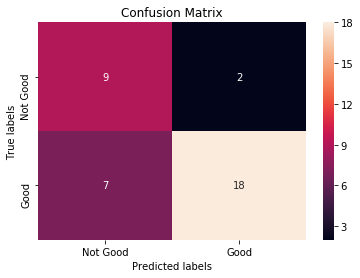

In [278]:
from sklearn.metrics import confusion_matrix
y_pred_svr_linear = to_labels(y_pred_svr_linear)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_svr_linear))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_svr_linear))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test,y_pred_svr_linear))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test,y_pred_svr_linear))
# Confusion Matrix Generation
conf_matrix_svr_linear = confusion_matrix(y_test, y_pred_svr_linear)
confusion_matrix_plot_one_all(conf_matrix_svr_linear)

In [279]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel = 'rbf', C=1.0)
svr_rbf.fit(X_train,y_train)

y_pred_svr_rbf = svr_rbf.predict(X_test)

('Accuracy : ', 0.6944444444444444)
('F1 Score :', 0.819672131147541)
('Precision : ', 0.6944444444444444)
('Recall : ', 1.0)


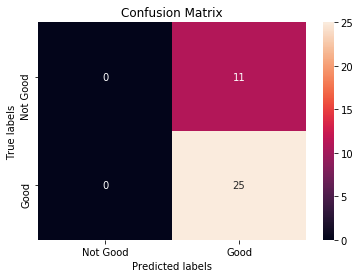

In [280]:
from sklearn.metrics import confusion_matrix
y_pred_svr_rbf = to_labels(y_pred_svr_rbf )
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_svr_rbf))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_svr_rbf ))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test,y_pred_svr_rbf ))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test,y_pred_svr_rbf ))
# Confusion Matrix Generation
conf_matrix_svr_rbf = confusion_matrix(y_test,y_pred_svr_rbf)
confusion_matrix_plot_one_all(conf_matrix_svr_rbf)

# *Transfer Learning*

In [186]:
X_train = X_data_scaled_one_all[:,[0,1,2,4]]
y_train = y_data_one_all

print("X_train.shape = ",X_train.shape)
print("y_train.shape = ",y_train.shape)

('X_train.shape = ', (730L, 4L))
('y_train.shape = ', (730L,))


In [188]:
def generate_test_labels(label):
    if(label =="good"):
        return 1
    elif(label =="bad"):
        return 0

df_test = pd.read_csv("C:/Users/HP/Downloads/Testing_Transformers.csv")
df_test['labels'] = df_test.apply(lambda x : generate_test_labels(x['Label']),axis=1)
df_test.drop(columns=['Label','IFT'],inplace=True,axis=1)
df_test.head()


,Water,Acidity,BDV,Color,labels
0,14.35,0.040,44,3.0,0
1,12.06,0.037,57,2.5,1
2,14.50,0.049,60,1.5,0
3,11.45,0.020,52,1.0,1
4,22.69,0.087,49,1.5,0


In [83]:
def reversing(lab_list):
    lab_return = []
    for i in range(0,len(lab_list)):
        if(lab_list[i]==0):
            lab_return.append(1)
        elif(lab_list[i]==1):
            lab_return.append(0)
    return np.array(lab_return)

In [189]:
from sklearn.preprocessing import MinMaxScaler
y_test = df_test['labels'].values
X_test_unscaled = df_test.iloc[:,0:4].values
scaler_test = MinMaxScaler()
X_test = scaler_test.fit_transform(X_test_unscaled)

print("X_test.shape  = ",X_test.shape)
print("y_test.shape = ",y_test.shape)

('X_test.shape  = ', (36L, 4L))
('y_test.shape = ', (36L,))


# *Soft-Voting Based Ensemble Model*

## 1. *Ensemble of Classical(Non-Tree based) Models*

In [190]:
# K-Nearest Neighbors

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print("knn best parameters :", knn_gs.best_params_)

#Logistic Regression

from sklearn.linear_model import LogisticRegression
#create a new logistic regression model
log = LogisticRegression()
#use gridsearch to test all parameter values for logistic regression
params_log = { 'C':(list(np.logspace(0, 4, 10))), 'solver' :('lbfgs','newton-cg','sag')}
log_gs = GridSearchCV(log, params_log, cv=5)
#fit the model to the training data
log_gs.fit(X_train, y_train)
#save best model
log_best = log_gs.best_estimator_
#check best parameter values
print("logistic regression best parameters :" ,log_gs.best_params_)

# Support Vector Machine

from sklearn import svm
#create a new support vector machine model
support_vector = svm.SVC(gamma='auto',probability=True)
#use gridsearch to test all parameter values for support vector machine
params_svm = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1,2,5,8,10]}
svm_gs = GridSearchCV(support_vector, params_svm, cv=5)
#fit the model to the training data
svm_gs.fit(X_train,y_train)
#save best model
svm_best = svm_gs.best_estimator_
#check best parameter values
print("support vector machine best parameters :" ,svm_gs.best_params_)

#Naive Bayes

from sklearn.naive_bayes import MultinomialNB
#create a new support vector machine model
naive_bayes = MultinomialNB()
#fit the model to the training data
naive_bayes.fit(X_train,y_train)

# Voting Based Ensemble

from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators_classical=[('knn', knn_best), ('support_vector', svm_best), ('log', log_best), ('naive_bayes',naive_bayes)]
#create our voting classifier, inputting our models
ensemble_classical = VotingClassifier(estimators_classical, voting='soft')
#fit model to training data
ensemble_classical.fit(X_train, y_train)



('knn best parameters :', {'n_neighbors': 9})


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

('logistic regression best parameters :', {'C': 166.81005372000593, 'solver': 'lbfgs'})
('support vector machine best parameters :', {'kernel': 'linear', 'C': 1})


VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')), ('support_vector', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=...=0, warm_start=False)), ('naive_bayes', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

## *2. Ensemble of Tree Based Classifiers*

In [191]:
# Bagging of Decision Trees

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# create a bagging based decison tree
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
# fit the data to the model
bag_clf.fit(X_train, y_train)

# AdaBoost Algorithm

from sklearn.ensemble import AdaBoostClassifier
# create an adaboost model
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
# fit the data to the model
ada_clf.fit(X_train, y_train)

# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingRegressor
# create a gradient boost model
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
# fit the data to the model
gbrt.fit(X_train, y_train)

# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

# Voting Based Ensemble

from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators_trees=[('bag_clf', bag_clf), ('ada_clf', ada_clf),('rf',rf_best)]
#create our voting classifier, inputting our models
ensemble_trees = VotingClassifier(estimators_trees, voting='soft')
#fit model to training data
ensemble_trees.fit(X_train, y_train)


{'n_estimators': 200}


VotingClassifier(estimators=[('bag_clf', BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

# *Final Ensemble Based Model*

('Accuracy Ensemble Based : ', 0.8611111111111112)
('F1 Score :', 0.8936170212765958)
('Precision : ', 0.9545454545454546)
('Recall : ', 0.84)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


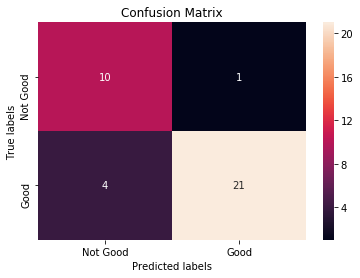

In [205]:
# Combination of both classical and tree based ensembles
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# create a dictionary of our models
estimators_combined = [('classical',ensemble_classical),('tree_based',ensemble_trees)]
# create our voting classifier, inputting our models
ensemble_combined = VotingClassifier(estimators_combined, voting='soft')
# fit model to training data
ensemble_combined.fit(X_train, y_train)
# test our model on the test data
ensemble_combined_pred = ensemble_combined.predict(X_test)
# Finding accuracy
print('Accuracy Ensemble Based : ',accuracy_score(y_test,ensemble_combined_pred))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, ensemble_combined_pred))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, ensemble_combined_pred))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, ensemble_combined_pred))
# Confusion Matrix Generation
conf_matrix_combined = confusion_matrix(y_test,ensemble_combined_pred)
confusion_matrix_plot_one_all(conf_matrix_combined)



# *Ablation Studies*

## *1.Tree Based Ensemble & Subparts*

('Accuracy : ', 0.8333333333333334)
('F1 Score :', 0.8695652173913043)
('Precision : ', 0.9523809523809523)
('Recall : ', 0.8)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


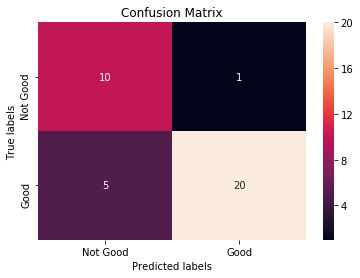

In [194]:
# Metrics of Tree Based Ensemble
y_pred_ensemble_tree = ensemble_trees.predict(X_test)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_ensemble_tree))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_ensemble_tree))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, y_pred_ensemble_tree))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, y_pred_ensemble_tree))
# Confusion Matrix Generation
conf_matrix_ensemble_tree = confusion_matrix(y_test,y_pred_ensemble_tree)
confusion_matrix_plot_one_all(conf_matrix_ensemble_tree)


('Accuracy : ', 0.8888888888888888)
('F1 Score :', 0.9166666666666666)
('Precision : ', 0.9565217391304348)
('Recall : ', 0.88)


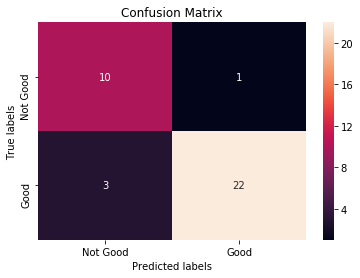

In [195]:
# Metrics of Bagging
y_pred_bag = bag_clf.predict(X_test)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_bag))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_bag))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test,y_pred_bag))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test,y_pred_bag))
# Confusion Matrix Generation
conf_matrix_bag = confusion_matrix(y_test,y_pred_bag)
confusion_matrix_plot_one_all(conf_matrix_bag)


('Accuracy : ', 0.75)
('F1 Score :', 0.7906976744186047)
('Precision : ', 0.9444444444444444)
('Recall : ', 0.68)


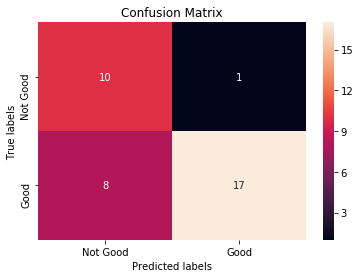

In [201]:
# Metrics of AdaBoost
y_pred_ada = ada_clf.predict(X_test)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_ada))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_ada))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test,y_pred_ada))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test,y_pred_ada))
# Confusion Matrix Generation
conf_matrix_ada = confusion_matrix(y_test,y_pred_ada)
confusion_matrix_plot_one_all(conf_matrix_ada)

('Accuracy : ', 0.8333333333333334)
('F1 Score :', 0.8695652173913043)
('Precision : ', 0.9523809523809523)
('Recall : ', 0.8)


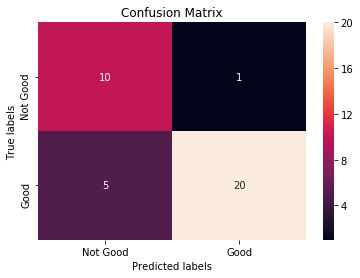

In [202]:
# Metrics of Random Forest
y_pred_rf = rf_best.predict(X_test)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_rf))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_rf))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test,y_pred_rf))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test,y_pred_rf))
# Confusion Matrix Generation
conf_matrix_rf = confusion_matrix(y_test,y_pred_rf)
confusion_matrix_plot_one_all(conf_matrix_rf)

## *2. Classical Based Ensemble & Subparts*

('Accuracy : ', 0.8611111111111112)
('F1 Score :', 0.8979591836734694)
('Precision : ', 0.9166666666666666)
('Recall : ', 0.88)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


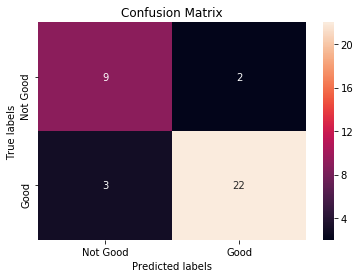

In [204]:
# Metrics of Classical Ensemble
y_pred_cl = ensemble_classical.predict(X_test)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_cl))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_cl))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test,y_pred_cl))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test,y_pred_cl))
# Confusion Matrix Generation
conf_matrix_cl = confusion_matrix(y_test,y_pred_cl)
confusion_matrix_plot_one_all(conf_matrix_cl)

('Accuracy : ', 0.7777777777777778)
('F1 Score :', 0.8260869565217391)
('Precision : ', 0.9047619047619048)
('Recall : ', 0.76)


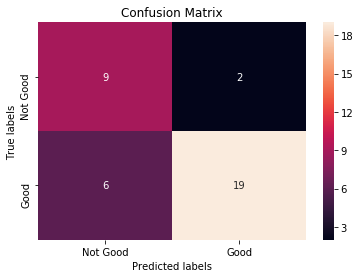

In [206]:
# Metrics of K-NN
y_pred_knn = knn_best.predict(X_test)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_knn))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_knn))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test,y_pred_knn))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test,y_pred_knn))
# Confusion Matrix Generation
conf_matrix_knn = confusion_matrix(y_test,y_pred_knn)
confusion_matrix_plot_one_all(conf_matrix_knn)

('Accuracy : ', 0.75)
('F1 Score :', 0.8085106382978724)
('Precision : ', 0.8636363636363636)
('Recall : ', 0.76)


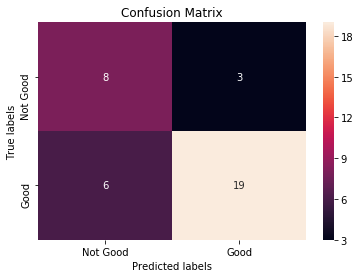

In [208]:
# Metrics of SVM
y_pred_svm = svm_best.predict(X_test)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_svm))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_svm))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test,y_pred_svm))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test,y_pred_svm))
# Confusion Matrix Generation
conf_matrix_svm = confusion_matrix(y_test,y_pred_svm)
confusion_matrix_plot_one_all(conf_matrix_svm)

('Accuracy : ', 0.8333333333333334)
('F1 Score :', 0.8749999999999999)
('Precision : ', 0.9130434782608695)
('Recall : ', 0.84)


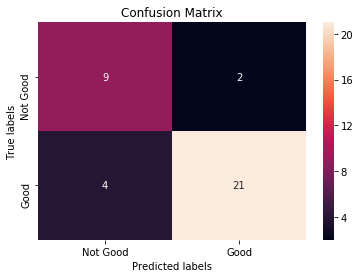

In [209]:
# Metrics of Logistic Regression
y_pred_log = log_best.predict(X_test)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_log))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_log))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test,y_pred_log))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test,y_pred_log))
# Confusion Matrix Generation
conf_matrix_log = confusion_matrix(y_test,y_pred_log)
confusion_matrix_plot_one_all(conf_matrix_log)

('Accuracy : ', 0.8333333333333334)
('F1 Score :', 0.8928571428571428)
('Precision : ', 0.8064516129032258)
('Recall : ', 1.0)


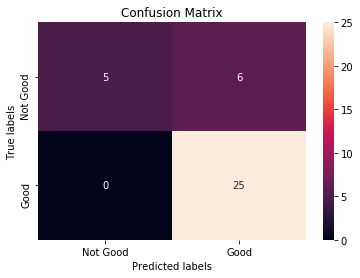

In [210]:
# Metrics of Naive Bayes
y_pred_nb = naive_bayes.predict(X_test)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,y_pred_nb))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, y_pred_nb))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test,y_pred_nb))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test,y_pred_nb))
# Confusion Matrix Generation
conf_matrix_nb = confusion_matrix(y_test,y_pred_nb)
confusion_matrix_plot_one_all(conf_matrix_nb)

## *3. PCA Reduction*

('Accuracy : ', 0.5277777777777778)
('F1 Score :', 0.6046511627906976)
('Precision : ', 0.7222222222222222)
('Recall : ', 0.52)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


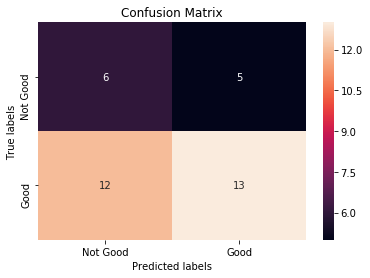

In [212]:
# PCA Reduction of Data
from sklearn.decomposition import PCA
num_features = 3
pca_en = PCA(n_components = num_features)
X_pca_train=np.abs(pca_en.fit_transform(X_train))
X_pca_test = np.abs(pca_en.fit_transform(X_test))
# fit model to training data
ensemble_combined.fit(X_pca_train, y_train)
# test our model on the test data
ensemble_pca = ensemble_combined.predict(X_pca_test)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,ensemble_pca))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, ensemble_pca))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, ensemble_pca))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, ensemble_pca))
# Confusion Matrix Generation
conf_matrix_combined_pca = confusion_matrix(y_test,ensemble_pca)
confusion_matrix_plot_one_all(conf_matrix_combined_pca)


## *4. LDA Based Reduction*

In [138]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
X_lda_en = lda.fit(X_train,y_train).transform(X_train)
print(X_lda_en.shape)

(730L, 1L)


## *5. UpSampling Data*

('Accuracy : ', 0.8055555555555556)
('F1 Score :', 0.8444444444444444)
('Precision : ', 0.95)
('Recall : ', 0.76)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


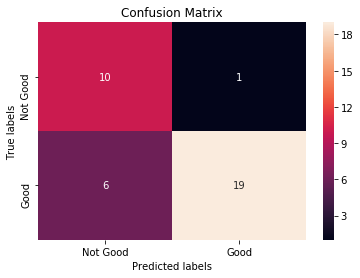

In [213]:

# fit model to training data
ensemble_combined.fit(X_data_up[:,[0,1,2,4]], y_data_up)
# test our model on the test data
ensemble_up = ensemble_combined.predict(X_test)
#print(ensemble_pca)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,ensemble_up))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, ensemble_up))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, ensemble_up))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, ensemble_up))
# Confusion Matrix Generation
conf_matrix_up = confusion_matrix(y_test,ensemble_up)
confusion_matrix_plot_one_all(conf_matrix_up)

## *6. DownSampling Data*

('Accuracy : ', 0.7222222222222222)
('F1 Score :', 0.7727272727272727)
('Precision : ', 0.8947368421052632)
('Recall : ', 0.68)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


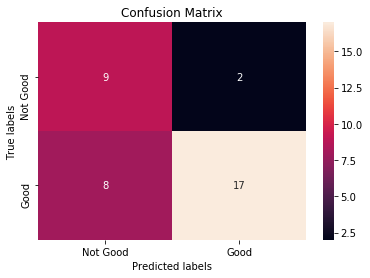

In [215]:
# fit model to training data
ensemble_combined.fit(X_data_down[:,[0,1,2,4]], y_data_down)
# test our model on the test data
ensemble_down = ensemble_combined.predict(X_test)
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,ensemble_down))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, ensemble_down))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, ensemble_down))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, ensemble_down))
# Confusion Matrix Generation
conf_matrix_down = confusion_matrix(y_test,ensemble_down)
confusion_matrix_plot_one_all(conf_matrix_down)

## *7. Feature Selection*

('Accuracy : ', 0.8333333333333334)
('F1 Score :', 0.8749999999999999)
('Precision : ', 0.9130434782608695)
('Recall : ', 0.84)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


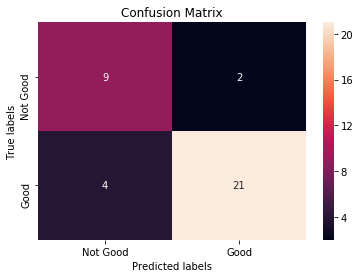

In [220]:
# fit model to training data
ensemble_combined.fit(X_train[:,[1,2,3]],y_train)
# test our model on the test data
ensemble_fs = ensemble_combined.predict(X_test[:,[1,2,3]])
# Finding accuracy
print('Accuracy : ',accuracy_score(y_test,ensemble_fs))
# Finding F1-Score
from sklearn.metrics import f1_score
print('F1 Score :',f1_score(y_test, ensemble_fs))
from sklearn.metrics import precision_score
print('Precision : ',precision_score(y_test, ensemble_fs))
from sklearn.metrics import recall_score
print('Recall : ',recall_score(y_test, ensemble_fs))
# Confusion Matrix Generation
conf_matrix_fs = confusion_matrix(y_test,ensemble_fs)
confusion_matrix_plot_one_all(conf_matrix_fs)